# Pytorch Workflow
Resources

*   https://www.learnpytorch.io/01_pytorch_workflow/




In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # นำโมดูล nn (Neural Networks) จากไลบรารี torch เข้ามาใช้งาน
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.3.0+cu121'

# 1.Data (preparing and loading)
ข้อมูลที่นำมาใช้งานมีได้หลายอย่าตัวอย่างเช่น

* Sheet
* Img
* Video
* Audio
* DNA
* Text

Machine learning is a game of two parts:

1. นำข้อมูลมาแสดงเป็นตัวเลข

2. สร้างแบบจำลองเพื่อเรียนรู้รูปแบบในการแทนตัวเลขนั้น

to showcase

We'll use linear regression to create the data with known parameters

การสร้างข้อมูลด้วยการถดถอยเชิงเส้นแบบมีพารามิเตอร์ที่ทราบ เป็นวิธีการสร้างชุดข้อมูลจำลอง โดยใช้สมการถดถอยเชิงเส้น ควบคุมความสัมพันธ์ระหว่าง x และ y ได้ เหมาะสำหรับการศึกษาโมเดล Machine Learning

In [3]:
#create paraniter
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #เพิ่มมิติ
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

###1.1 อธิบายโค้ด PyTorch: สร้างข้อมูลและแสดงผล

**โค้ด:**

```python
# สร้างพารามิเตอร์
weight = 0.7
bias = 0.3

# กำหนดช่วงข้อมูล
start = 0
end = 1
step = 0.02

# สร้าง Tensor 'X'
X = torch.arange(start, end, step).unsqueeze(dim=1)  # เพิ่มมิติ

# สร้าง Tensor 'y'
y = weight * X + bias

# แสดงผล 10 ค่าแรกของ X และ y
print(X[:10], y[:10])
```

**อธิบาย:**

**1. สร้างพารามิเตอร์:**

- `weight` และ `bias` เป็นพารามิเตอร์ของสมการเส้นตรง
    - `weight` ควบคุมความชันของเส้น
    - `bias` ควบคุมจุดตัดแกน y

**2. กำหนดช่วงข้อมูล:**

- `start` และ `end` กำหนดช่วงของค่า x
- `step` กำหนดขนาดก้าวของค่า x

**3. สร้าง Tensor 'X':**

- `torch.arange(start, end, step)` สร้าง Tensor ของค่า x
    - ค่า x อยู่ในช่วง `[start, end)`
    - มีขนาดก้าว `step`
- `.unsqueeze(dim=1)` เพิ่มมิติที่ 1 ให้กับ Tensor 'X'
    - ตอนนี้ 'X' มีขนาด `(จำนวนค่า x, 1)`

**4. สร้าง Tensor 'y':**

- `y = weight * X + bias` คำนวณค่า y
    - คูณ 'X' ด้วย 'weight'
    - บวก 'bias'
    - 'y' มีขนาด `(จำนวนค่า x, 1)` เช่นเดียวกับ 'X'

**5. แสดงผล:**

- `print(X[:10], y[:10])` แสดงผล 10 ค่าแรกของ 'X' และ 'y'
    - `[:10]` เลือก 10 ค่าแรกจาก Tensor



**สรุป:**

- โค้ดสร้าง Tensor 'X' ของค่า x
- สร้าง Tensor 'y' ของค่า y โดยใช้สมการเส้นตรง
- แสดงผล 10 ค่าแรกของ 'X' และ 'y'


#1.2 Split data into training and test sets

In [4]:
len(X),len(y)
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

##1.2.1  อธิบายโค้ด PyTorch: แบ่งข้อมูลเป็น Train/Test Set

**1. len(X), len(y):**

- บรรทัดแรก `len(X), len(y)` ตรวจสอบความยาว (จำนวนแถว) ของ Tensor 'X' และ 'y'
    - ผลลัพธ์ที่ได้ควรจะเท่ากัน
    - เพราะ 'X' และ 'y' สร้างขึ้นมาโดยอิงจำนวนค่า x ที่เท่ากัน

**2. แบ่งข้อมูลเป็น Train/Test Set:**

- `train_split = int(0.8 * len(X))`
    - คำนวณจำนวนแถวที่จะใช้สำหรับ Train set
    - คิดเป็น 80% ของความยาวทั้งหมด (len(X))
- `X_train, y_train = X[:train_split], y[:train_split]`
    - แบ่งข้อมูล Train set
    - โดยเลือก `train_split` แถวแรกจาก 'X' และ 'y'
    - เก็บไว้ใน Tensor 'X_train' และ 'y_train'
- `X_test, y_test = X[train_split:], y[train_split:]`
    - แบ่งข้อมูล Test set
    - โดยเลือกแถวที่เหลือตั้งแต่ `train_split` ถึงสุดท้าย
    - เก็บไว้ใน Tensor 'X_test' และ 'y_test'

**3. len(X_train), len(y_train), len(X_test), len(y_test):**

- บรรทัดสุดท้าย `len(X_train), len(y_train), len(X_test), len(y_test)`
  ตรวจสอบความยาวของ Train/Test set
- ผลลัพธ์ที่ได้
    - `len(X_train)` ควรประมาณ 80% ของ `len(X)`
    - `len(y_train)` ควรเท่ากับ `len(X_train)`
    - `len(X_test)` ควรประมาณ 20% ของ `len(X)`
    - `len(y_test)` ควรเท่ากับ `len(X_test)`

**สรุป:**

- โค้ดนี้แบ่งข้อมูล Train/Test set
  โดยใช้ 80% สำหรับ Train set และ 20% สำหรับ Test set
- ตรวจสอบความยาวของ Train/Test set เพื่อยืนยันการแบ่งข้อมูลที่ถูกต้อง

**หมายเหตุ:**

- การแบ่งข้อมูลเป็น Train/Test set เป็นขั้นตอนสำคัญในการเรียนรู้ของ Machine Learning
- Train set ใช้สำหรับฝึกโมเดล
- Test set ใช้สำหรับประเมินประสิทธิภาพของโมเดล

# 1.3 Let's create a function to visualize it.

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


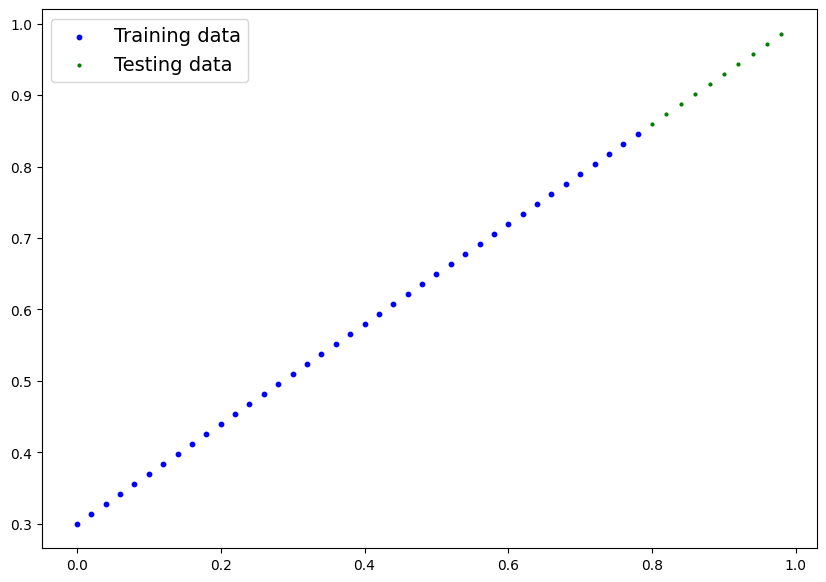

In [6]:
  plot_predictions();

###1.3.1  อธิบายฟังก์ชัน `plot_predictions` ใน Python

ฟังก์ชันนี้มีวัตถุประสงค์เพื่อ **พล็อตข้อมูล** สำหรับการวิเคราะห์การถดถอยเชิงเส้น
โดยแสดงข้อมูล Train, Test และเปรียบเทียบกับผลการทำนาย (ถ้ามี)

**พารามิเตอร์:**

- `train_data` (default: X_train): ข้อมูล Train (ค่า x)
- `train_labels` (default: y_train): ค่าจริง (y) ที่ตรงกับข้อมูล Train
- `test_data` (default: X_test): ข้อมูล Test (ค่า x)
- `test_labels` (default: y_test): ค่าจริง (y) ที่ตรงกับข้อมูล Test
- `predictions` (default: None): ผลการทำนาย (y) จากโมเดล (ถ้ามี)

**ขั้นตอนการทำงาน:**

1. **กำหนดขนาดกราฟ:**
    - `plt.figure(figsize=(10, 7))` ตั้งค่าขนาดกราฟเป็น 10 x 7 นิ้ว

2. **พล็อตข้อมูล Train:**
    - `plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")`
        - ใช้ `plt.scatter` เพื่อพล็อตข้อมูลเป็นจุดสีน้ำเงิน (c="b")
        - แกน x คือ `train_data` (ค่า x)
        - แกน y คือ `train_labels` (ค่าจริง y)
        - `s=4` กำหนดขนาดของจุด
        - `label="Training data"` กำหนดชื่อของข้อมูล Train ในตำนาน

3. **พล็อตข้อมูล Test:**
    - `plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")`
        - ใช้ `plt.scatter` เพื่อพล็อตข้อมูลเป็นจุดสีเขียว (c="g")
        - แกน x คือ `test_data` (ค่า x)
        - แกน y คือ `test_labels` (ค่าจริง y)
        - `s=4` กำหนดขนาดของจุด
        - `label="Testing data"` กำหนดชื่อของข้อมูล Test ในตำนาน

4. **พล็อตผลการทำนาย (ถ้ามี):**
    - `if predictions is not None:`
        - ตรวจสอบว่ามีการป้อนค่า `predictions` เข้ามาหรือไม่
    - `plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")`
        - ใช้ `plt.scatter` เพื่อพล็อตผลการทำนายเป็นจุดสีแดง (c="r")
        - แกน x คือ `test_data` (ค่า x) (เหมือนกับข้อมูล Test)
        - แกน y คือ `predictions` (ผลการทำนาย y)
        - `s=4` กำหนดขนาดของจุด
        - `label="Predictions"` กำหนดชื่อของผลการทำนายในตำนาน

5. **แสดงหัวข้อข้อมูล:**
    - `plt.legend(prop={"size": 14});`
        - แสดงหัวข้อข้อมูล (legend) ที่ด้านบนของกราฟ
        - `prop={"size": 14}` กำหนดขนาดตัวอักษรเป็น 14

6. **เรียกใช้ฟังก์ชัน:**
    - `plot_predictions();`
        - เรียกใช้ฟังก์ชัน `plot_predictions` โดยไม่ป้อนค่า (ใช้ค่า default)

**ผลลัพธ์:**

- กราฟจะแสดง:
    - จุดสีน้ำเงิน แสดงข้อมูล Train
    - จุดสีเขียว แสดงข้อมูล Test
    - จุดสีแดง (ถ้ามี) แสดงผลการทำนายของโมเดล
- ตำนานจะแสดงชื่อของข้อมูลแต่ละประเภท


# 2.Build Model
Fist Pytorch

##2.1 Create a Linear Regression model class

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- เป็น คลาสพื้นฐาน สำหรับการสร้างโมเดลเครือข่ายประสาทเทียม (Neural Network
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

###### อธิบายโค้ด PyTorch: สร้างคลาสโมเดล Linear Regression

โค้ดนี้สร้างคลาส `LinearRegressionModel`
ซึ่งสืบทอดจากคลาส `nn.Module` ของ PyTorch
เพื่อสร้างโมเดลการถดถอยเชิงเส้น

**1. คลาส `LinearRegressionModel`:**

- สืบทอดจาก `nn.Module`
  หมายความว่าคลาสนี้สามารถใช้สร้างโมเดลเครือข่ายประสาทเทียมได้

**2. วิธีการ `__init__`:**

- กำหนดพารามิเตอร์ของโมเดล:
    - `self.weights`
        - เป็น Tensor ขนาด (1, 1)
        - ค่าเริ่มต้นเป็นการสุ่มแบบปกติ (randn)
        - ประเภทข้อมูลเป็น float
        - `requires_grad=True`
          บ่งบอกว่าพารามิเตอร์นี้ต้องปรับค่าระหว่างการฝึกอบรม
    - `self.bias`
        - คล้ายกับ `self.weights`
        - แต่มีขนาด (1, 1)
          แทนที่จะเป็น (จำนวนคุณสมบัติ, 1)

**3. วิธีการ `forward`:**

- กำหนดการคำนวณที่เกิดขึ้นในโมเดล:
    - รับ Tensor `x`
      ซึ่งควรมีขนาด (จำนวนตัวอย่าง, จำนวนคุณสมบัติ)
    - คำนวณผลลัพธ์ของโมเดล
      โดยใช้ `self.weights * x + self.bias`
    - ส่งกลับ Tensor `y`
      ซึ่งมีขนาด (จำนวนตัวอย่าง, 1)

**สรุป:**

- โค้ดนี้สร้างคลาส `LinearRegressionModel`
  สำหรับโมเดลการถดถอยเชิงเส้นแบบง่าย
- โมเดลมีพารามิเตอร์ 2 ตัว: `weights` และ `bias`
- วิธีการ `forward` กำหนดการคำนวณผลลัพธ์ (y)
  จากค่าป้อนเข้า (x)

**หมายเหตุ:**

- โค้ดนี้เป็นเพียงตัวอย่างพื้นฐาน
  คุณสามารถปรับแต่งเพิ่มเติมได้
  เช่น เพิ่มชั้นเพิ่มเติม
  ใช้ฟังก์ชันการกระตุ้น
  หรือกำหนดวิธีการอื่นๆ
- ศึกษาเพิ่มเติมเกี่ยวกับโมเดล Linear Regression
  และ PyTorch: [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)


##PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn. Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
 สิ่งสำคัญสำหรับการสร้างโมเดล PyTorch

4 ส่วนสำคัญสำหรับการสร้างโมเดลด้วย PyTorch

**1. torch.nn:**

- ห้องสมุด `torch.nn` ประกอบด้วย **บล็อกการคำนวณ** (building blocks) ทั้งหมด
  สำหรับสร้าง **กราฟการคำนวณ** (computational graph)
- เครือข่ายประสาทเทียม (neural network)
  สามารถมองเป็นกราฟการคำนวณชนิดหนึ่ง

**2. torch.nn.Parameter:**

- กำหนดว่า **พารามิเตอร์** ใด
  ที่โมเดลของเราควรเรียนรู้
- บ่อยครั้ง เลเยอร์ PyTorch จาก `torch.nn`
  จะสร้างพารามิเตอร์เหล่านี้ให้เราโดยอัตโนมัติ
- ตัวอย่างของพารามิเตอร์
  เช่น น้ำหนัก (weights) และ バイアス (bias)

**3. torch.nn.Module:**

- เป็น **คลาสพื้นฐาน** สำหรับโมดูลเครือข่ายประสาทเทียมทั้งหมด
- หากคุณสร้าง **คลาสย่อย** (subclass) จาก `torch.nn.Module`
  คุณควรเขียนทับ (overwrite) วิธีการ `forward`

**4. torch.optim:**

- ห้องสมุด `torch.optim` เป็นที่อยู่ของ **ตัวเพิ่มประสิทธิภาพ** (optimizers) ใน PyTorch
- ตัวเพิ่มประสิทธิภาพเหล่านี้
  จะช่วยปรับน้ำหนักของโมเดล
  โดยใช้เทคนิคการ **ลดระดับ** (gradient descent)

**5. def forward():**

- ทุกคลาสย่อยของ `nn.Module`
  จำเป็นต้องเขียนทับ (overwrite) วิธีการ `forward`
- วิธีการนี้กำหนด **การคำนวณเบื้องต้น** (forward computation)
  ที่เกิดขึ้นภายในโมเดล

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

##checking the connectents of our pytorch model

let's created a model and see what inside

so we can check the model parameters or what inside model using `.parameters().`

In [8]:
#create random seed
torch.manual_seed(42)

#create an instance of model (sub class of nn.module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#List named paremeters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
#check weight,bias
weight,bias

(0.7, 0.3)

##Making predictions using `torch.inference_mode()`
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test.`

When we pass data to our model, it'll go through the model's `forward()` method


ในการตรวจสอบสิ่งนี้ เราสามารถส่งข้อมูลการทดสอบ `X_test` เพื่อดูว่าคาดการณ์ `y_test` ได้ใกล้เคียงแค่ไหน

เมื่อเราส่งข้อมูลไปยังโมเดลของเรา ข้อมูลจะถูกส่งไปยังเมธอด `forward()` ของโมเดล

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)
# Note: in older version PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

# 3.Train model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

• Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
• Loss function: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

Optimizer: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:

A training loop

A testing loop

In [12]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate


ค่า Learning Rate สูง:

* Optimizer ปรับพารามิเตอร์มาก

* โมเดลเรียนรู้เร็ว

* แต่โมเดลอาจไม่เสถียร และอาจบรรจบที่ค่า suboptimal ที่ไม่ดี

ค่า Learning Rate ต่ำ:

* Optimizer ปรับพารามิเตอร์น้อย

* โมเดลเรียนรู้ช้า

* แต่โมเดลมีแนวโน้มเสถียร และบรรจบที่ค่า optimal มากกว่า

## 3.1Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [13]:
#epoch is one loop through the data..
epochs = 200
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
###traning
#0. Loop through the data
for epoch in range(epochs):
  # set model to training mode
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Create the loss function
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Preform backpropagation on the loss with respect to the parameters of the model
  # สร้าง backpropagation ล่วงหน้าเมื่อสูญเสียโดยคำนึงถึงพารามิเตอร์ของโมเดล
  loss.backward()
  # 5. Optimizer step
  optimizer.step()
  # testing
  model_0.eval() #คำสั่ง ไม่เปลียนค่าและบันทึกต่างๆในโมเดลต้นแบบ ใช้เพื่อทดสอบการเรียนรู้และแสดงผลโดยไม่ส่งผลกระทบกับรุ่นต้นแบบ
  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
  # Print out what's happening
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        print(model_0.state_dict())

Loss : 0.31288138031959534
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss : 0.3013603389263153
Loss : 0.28983935713768005
Loss : 0.2783183455467224
Loss : 0.26679736375808716
Loss : 0.2552763521671295
Loss : 0.24375534057617188
Loss : 0.23223432898521423
Loss : 0.22071333229541779
Loss : 0.20919232070446014
Loss : 0.1976713240146637
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss : 0.18615034222602844
Loss : 0.1746293306350708
Loss : 0.16310831904411316
Loss : 0.1515873372554779
Loss : 0.14006635546684265
Loss : 0.1285453587770462
Loss : 0.11702437698841095
Loss : 0.1060912236571312
Loss : 0.09681284427642822
Loss : 0.08908725529909134
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [15]:
weight,bias

(0.7, 0.3)

In [16]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
# แสดงค่าพารามิเตอร์
print(model_0.state_dict())

# คาดการณ์ค่า
print(y_preds_new)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


Old predictions

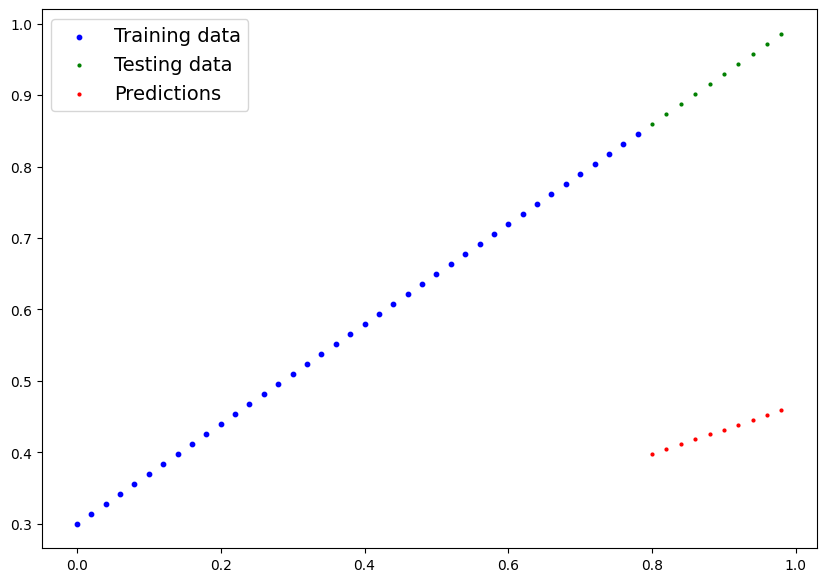

In [17]:
plot_predictions(predictions=y_preds);

New predictions

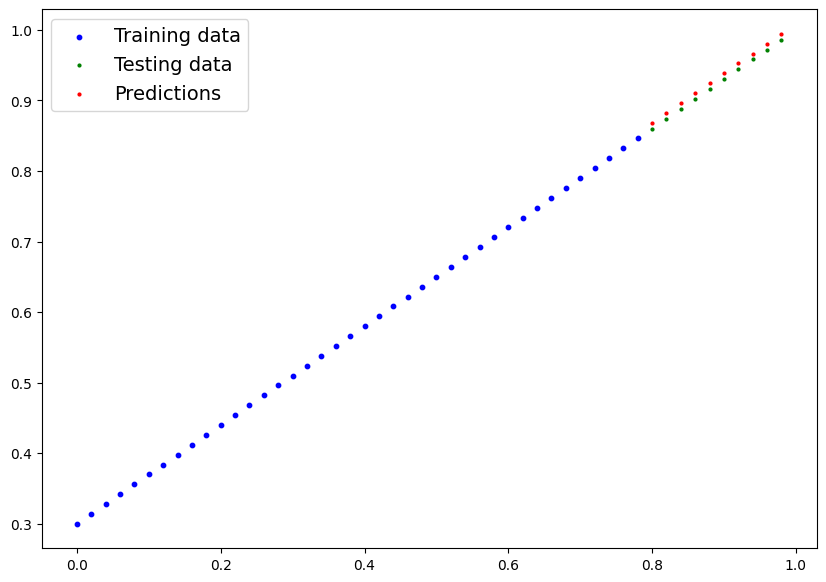

In [18]:
plot_predictions(predictions=y_preds_new);

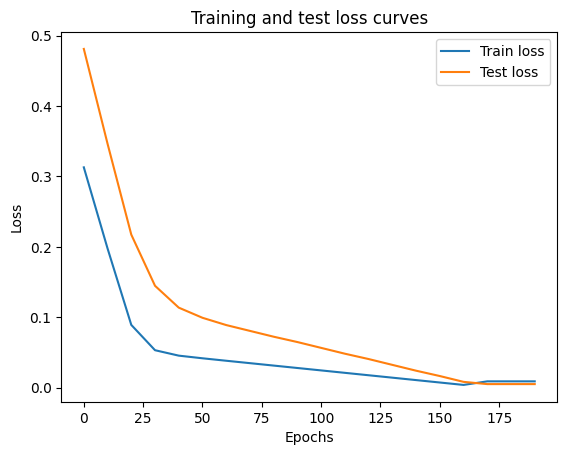

In [19]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 3.2save and load
save and load
1. `torch.save()`
2.`torch.load()`
3.`torch.nn.module.load_state_dict()`

pytorch https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [20]:
model_0

LinearRegressionModel()

In [21]:
# from pathlib import Path

# #1.create models directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# #2. create model save path
# MODEL_NAME = "01_Pytorch_Workflow_model_0.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# #3.save a model
# print(f"Saving model to : {MODEL_SAVE_PATH}")
# torch.save(obj=model_0.model.state_dict(),f=MODEL_SAVE_PATH)

from pathlib import Path

# 1. Create models directory (if it doesn't exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Pytorch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
model = model_0  # เปลี่ยนชื่อ model_0 เป็นชื่อที่สื่อความหมาย เช่น linear_regression_model
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_Pytorch_Workflow_model_0.pth


In [22]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun  8 13:02 01_Pytorch_Workflow_model_0.pth


Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at models/01_pytorch_workflow_model_0.pth
 we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))`

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
#load model
load_model_0 = LinearRegressionModel()
#load save state_dict of model
load_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
load_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
#make some pred with loaded modeld
load_model_0.eval()
with torch.inference_mode():
  load_model_preds = load_model_0(X_test)
# คาดการณ์ค่า
print(load_model_preds)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


In [27]:
load_model_0.eval()
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
y_pred == load_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 4.Put it all Together



In [29]:
# import pytorch and matplotlib
import torch
from torch import  nn
import matplotlib.pyplot as plt
torch.__version__

'2.3.0+cu121'

In [30]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [31]:
!nvidia_smi

/bin/bash: line 1: nvidia_smi: command not found


##4.1 Data

In [32]:
# Create weight and bias using the linear regression formula `(y = weight * X + bias).`
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [34]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=10, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


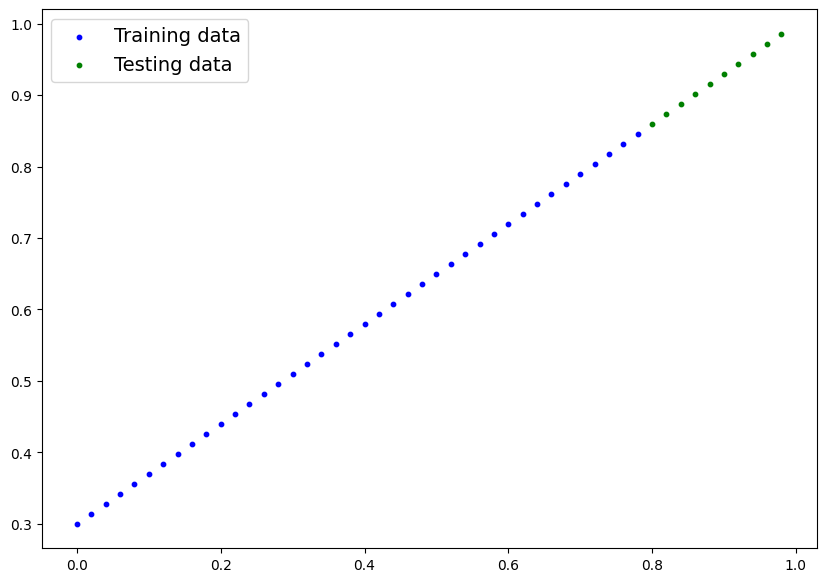

In [35]:
#plot the data
plot_predictions(X_train,y_train,X_test,y_test)

##4.2 Building a PyTorch linear Model

In [36]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

##4.3 Training
for training need:
* Loss function
* Optimizer
*Training loop
*Testing loop

In [39]:
#set up Loss function
loss_fn = nn.L1Loss()

#setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate
#epoch is one loop through the data..
torch.manual_seed(42)
epochs = 200
# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#0. Loop through the data
for epoch in range(epochs):
  # set model to training mode
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(X_train)
  # 2. Create the loss function
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Preform backpropagation on the loss with respect to the parameters of the model
  # สร้าง backpropagation ล่วงหน้าเมื่อสูญเสียโดยคำนึงถึงพารามิเตอร์ของโมเดล
  loss.backward()
  # 5. Optimizer step
  optimizer.step()
  model_1.eval() #คำสั่ง ไม่เปลียนค่าและบันทึกต่างๆในโมเดลต้นแบบ ใช้เพื่อทดสอบการเรียนรู้และแสดงผลโดยไม่ส่งผลกระทบกับรุ่นต้นแบบ
  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_1(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch % 10 == 0:
        # epoch_count.append(epoch)
        # train_loss_values.append(loss.detach().numpy())
        # test_loss_values.append(test_loss.detach().numpy())
  # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Loss : 0.5551779866218567
Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Loss : 0.5436569452285767
Loss : 0.5321359634399414
Loss : 0.5206149816513062
Loss : 0.5090939998626709
Loss : 0.49757298827171326
Loss : 0.4860519766807556
Loss : 0.47453099489212036
Loss : 0.4630100131034851
Loss : 0.45148906111717224
Loss : 0.4399680495262146
Epoch: 10 | Train loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Loss : 0.42844706773757935
Loss : 0.41692614555358887
Loss : 0.4054051339626312
Loss : 0.3938841223716736
Loss : 0.38236314058303833
Loss : 0.3708421289920807
Loss : 0.35932114720344543
Loss : 0.34780019521713257
Loss : 0.3362792134284973
Loss : 0.3247582018375397
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Loss : 0.31323719024658203
Loss : 0.3017162084579468
Loss : 0.2901952564716339
Loss : 0.27867424488067627
Loss : 0.2671532928943634
Loss : 0.2556322515010834
Loss : 0.24411126971244812
Loss : 0.23259028792381287
Loss : 0.

In [40]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [41]:
weight, bias

(0.7, 0.3)

##4.4 Make and evaluating prediction

In [42]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
# แสดงค่าพารามิเตอร์
# print(model_1.state_dict())
# คาดการณ์ค่า
y_preds,y_preds.device

(tensor([[0.8600],
         [0.8739],
         [0.8878],
         [0.9018],
         [0.9157],
         [0.9296],
         [0.9436],
         [0.9575],
         [0.9714],
         [0.9854]]),
 device(type='cpu'))

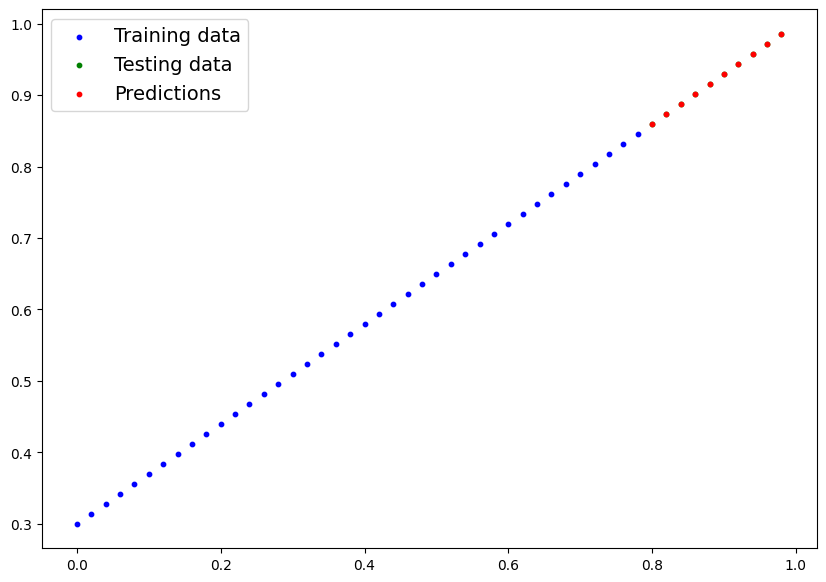

In [43]:
#check out model prediction visually
plot_predictions(predictions=y_preds.cpu())

##4.5 saving & loading a traning model

In [44]:
from pathlib import Path

# 1. Create models directory (if it doesn't exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Pytorch_Workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
model = model_1  # เปลี่ยนชื่อ model_0 เป็นชื่อที่สื่อความหมาย เช่น linear_regression_model
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_Pytorch_Workflow_model_1.pth


In [46]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [52]:
#load model
load_model_1 = LinearRegressionModelV2()
#load save state_dict of model
load_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
load_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
#make some pred with loaded modeld
load_model_1.eval()
with torch.inference_mode():
  load_model_preds = load_model_1(X_test)
print({y_preds == load_model_preds},{y_preds.device})

{tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])} {device(type='cpu')}
